In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

data_file = 'StepChange_18_to_202021-06-24 15-27-24.csv'

df = pd.read_csv(data_file)

df

,Time,Temperature set (C),Temperature measured (C),Sensor 1 (C),Sensor 2 (C),Sensor 3 (C),Sensor 4 (C)
0,2296.012188,19.334608,16.277572,21.116006,17.285076,16.539445,17.153579
1,2297.011844,19.224532,16.766652,21.028314,17.175509,16.451622,16.912425
2,2298.011999,19.307027,16.985380,20.896809,17.591778,16.451622,17.131668
3,2299.011151,19.362220,17.455458,22.301647,17.526077,16.583342,17.175509
4,2300.011998,19.293252,16.863559,21.094073,17.285076,16.539445,17.065900
5,2301.011585,19.279494,17.368001,21.774232,17.306984,16.627240,17.219338
6,2302.011424,19.293252,17.822087,20.984475,17.438453,17.087820,17.000121
7,2303.011205,19.307027,16.900015,21.510809,17.022059,15.990266,17.372728
8,2304.011701,19.307027,17.095666,21.006386,18.839321,16.693066,17.328908
9,2305.010882,19.265736,16.997594,21.444984,17.372728,16.780823,17.328908


In [66]:
window_size = 30
temp_set_rollling_avg= np.array(df.loc[:,'Temperature set (C)'].rolling(window = window_size, center = True).mean())
temp_measured_rollling_avg= np.array(df.loc[:,'Temperature measured (C)'].rolling(window = window_size, center = True).mean())

In [67]:
df['Temperature set (rolling mean) C'] = temp_set_rollling_avg
df['Temperature measured (rolling mean) C'] = temp_measured_rollling_avg

<IPython.core.display.Javascript object>


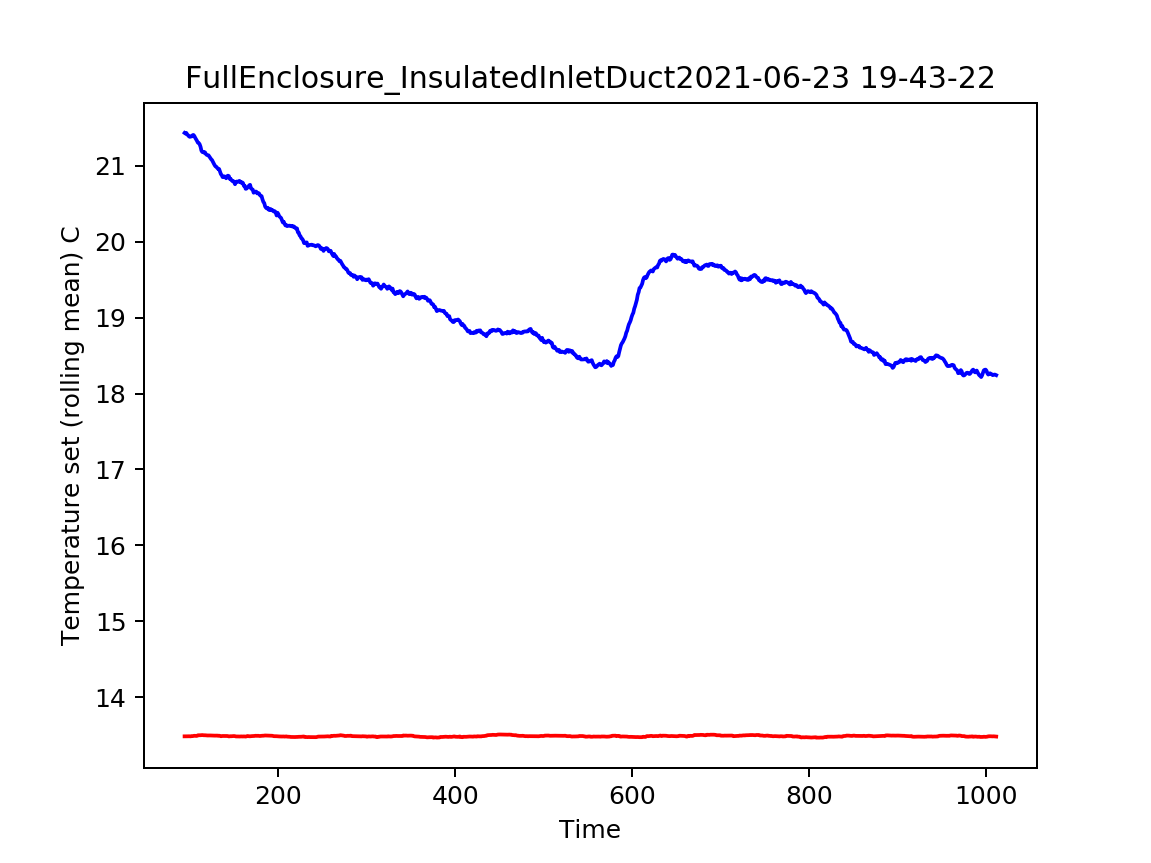

In [37]:
# Plot
%matplotlib notebook

plt.figure()
sns.lineplot(x = "Time", y = 'Temperature set (rolling mean) C', color = 'r', data =df)
sns.lineplot(x = "Time", y = 'Temperature measured (rolling mean) C', color = 'b', data = df)
plt.title(data_file[:-4])
# plt.savefig(data_file[:-4]+'.png', dpi = 300)
plt.show()

In [68]:
# Rolling average of other temp sensor readings
sens_1_rolling_avg= np.array(df.loc[:,'Sensor 1 (C)'].rolling(window = window_size, center = True).mean())
sens_2_rolling_avg= np.array(df.loc[:,'Sensor 2 (C)'].rolling(window = window_size, center = True).mean())
sens_3_rolling_avg= np.array(df.loc[:,'Sensor 3 (C)'].rolling(window = window_size, center = True).mean())
sens_4_rolling_avg= np.array(df.loc[:,'Sensor 4 (C)'].rolling(window = window_size, center = True).mean())

df['Sensor 1 (rolling avg)'] = sens_1_rolling_avg
df['Sensor 2 (rolling avg)'] = sens_2_rolling_avg
df['Sensor 3 (rolling avg)'] = sens_3_rolling_avg
df['Sensor 4 (rolling avg)'] = sens_4_rolling_avg

<IPython.core.display.Javascript object>


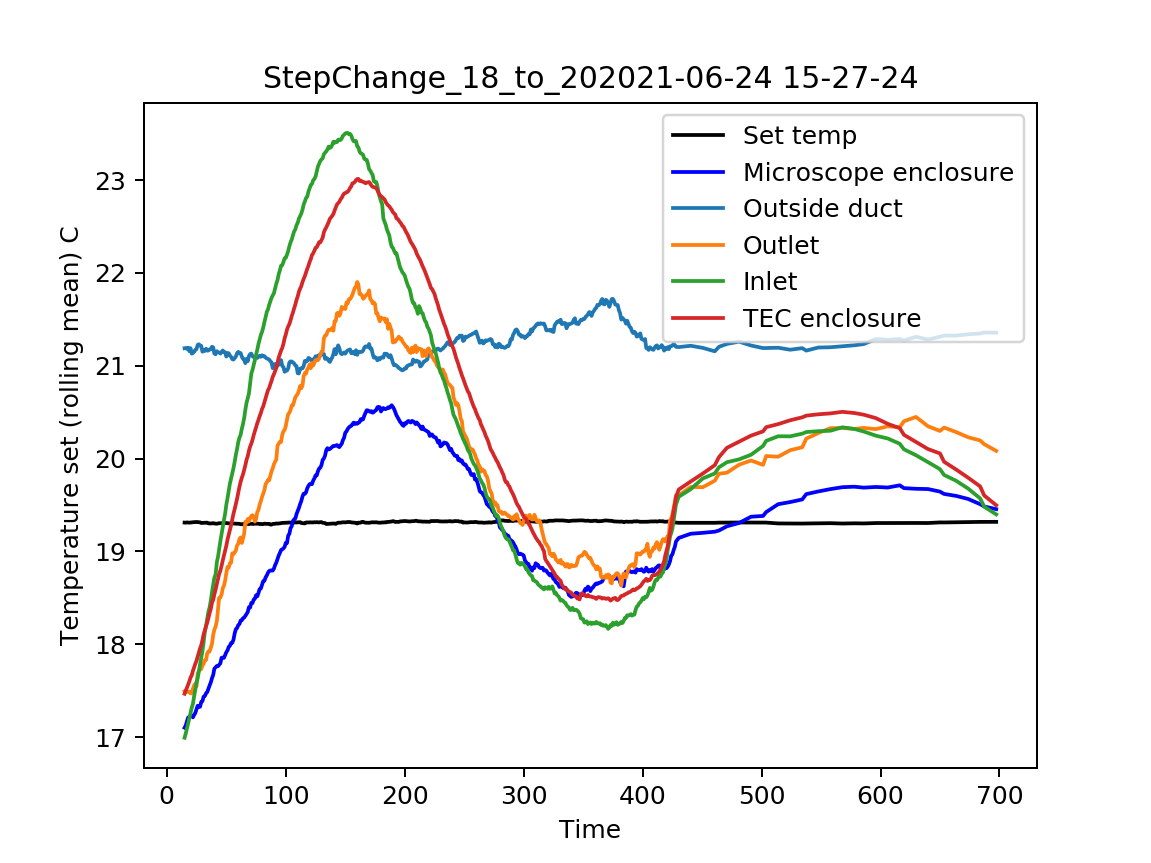

In [69]:
df["Time"] = df["Time"] - df["Time"][0]
# Plot the readings from the other sensors
plt.figure()
sns.lineplot(x = "Time", y = 'Temperature set (rolling mean) C', color = 'k', data =df, label = 'Set temp')
sns.lineplot(x = "Time", y = 'Temperature measured (rolling mean) C', color = 'b', data = df, label = 'Microscope enclosure')

sns.lineplot(x = "Time", y = 'Sensor 1 (rolling avg)', data = df, label = 'Outside duct')
sns.lineplot(x = "Time", y = 'Sensor 2 (rolling avg)', data = df, label = 'Outlet')
sns.lineplot(x = "Time", y = 'Sensor 3 (rolling avg)', data = df, label ='Inlet')
sns.lineplot(x = "Time", y = 'Sensor 4 (rolling avg)', data = df, label = 'TEC enclosure')

plt.legend()

plt.title(data_file[:-4])
plt.savefig(data_file[:-4]+'.png', dpi = 300)
plt.show()

In [13]:
# Fit a line to estimate slope
p = np.polyfit(np.array(df["Time"]), np.array(df["Temperature measured (C)"]), deg = 1)
p[0]

-0.0006941191612037089

Al duct with insulation: -0.002784317280528533 C/s
Plastic duct: -0.003977967660890617 C/s (50% fan speed)
Plastic duct: -0.0028325221176321988 (25% fan speed)

 

<IPython.core.display.Javascript object>


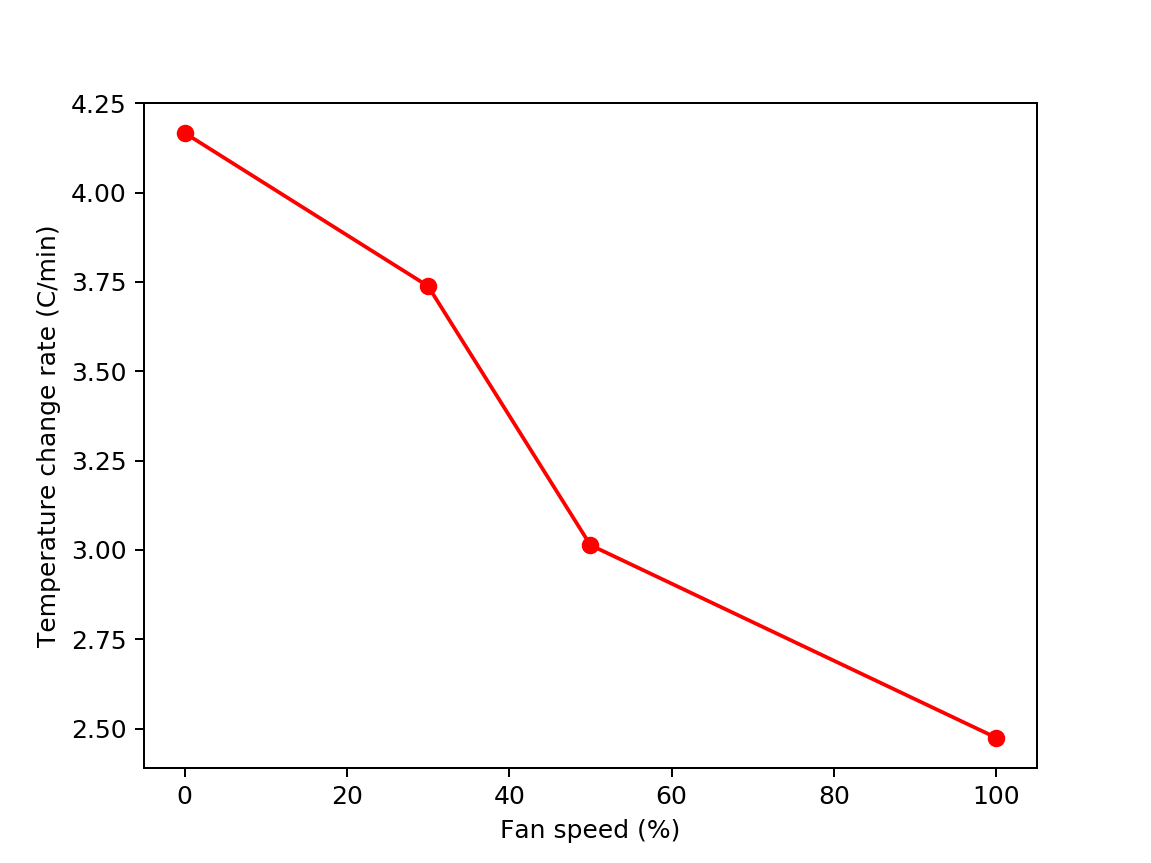

In [28]:
# Duct installed, No fan: -0.03684551
# No fan no duct (enclosure only): -0.0593734
# Duct installed + fan ON: -0.02263496
# Duct installed, Fan OFF: -0.03752431
# Enclosure only (Bigger Power supply): -0.06358272314324771
# ENclosure only (Smaller power supply): -0.0630065451067738
# Enclosure only (with Insulation): -0.07698356904560058


# Testing effects of fan-speed
# Fan + Duct: Fan speed=0 : -0.06945523464552782 C/s
# Fan + Duct: Fan speed=30: -0.062306531037606624 C/s
# Fan + Duct: Fan speed=50: -0.05022580126814528 C/s
# Fan + Duct: Fan speed=100: -0.04123832816494875 C/s
        
        
fan_speed = [0, 30, 50, 100]
temp_rate= 60*np.array([-0.06945523464552782, -0.062306531037606624, -0.05022580126814528, -0.04123832816494875])

plt.figure()
plt.plot(fan_speed, -temp_rate, 'ro-')
plt.xlabel('Fan speed (%)')
plt.ylabel('Temperature change rate (C/min)')
plt.savefig('Temp change rate vs fan speed.png', dpi = 300)
plt.show()

In [33]:
# Heat transfer calculations
Cp = 1 # 1kJ/kg K
rho_air = 1.22 #
Volume = 0.141 # m^3
Delta_T = 4
Time = 60

In [34]:
total_heat = lambda volume, delta_t: 1000*rho_air*volume*Cp*delta_t # heat in Joules

In [35]:
heat_transfer_rate = total_heat(Volume, Delta_T)/Time

In [36]:
print('Heat transfer rate: {} W'.format(heat_transfer_rate))

Heat transfer rate: 11.467999999999998 W


In [ ]:
# DeepCool Heat transfer rate: 1.8435555555555558 W
# ClimateRite (full microscope chamber): 2.1502499999999998 W
# ClimateRite (full microscope chamber): 3.4403999999999995 W
